#Buraeu Assignement

Name: Divij Mahajan

Colab: https://colab.research.google.com/drive/16k9pF89ePluuuKjJh3kixqpIt-DL118T#scrollTo=zp-tznuqz8Qd

Github: https://github.com/Divij-Mahajan/Loan-Application-Predicition

## Data Information Extraction

In [1]:
import pandas as pd

data = pd.read_csv('Assignment_Train.csv')

In [2]:
import pandas as pd

test_data = pd.read_csv('Assignment_Test.csv')

In [3]:
# column name is just combination of column FIRST NAME, middle NAME and last NAME
(data['FIRST NAME']+data['MIDDLE NAME'].fillna('').apply(lambda x: '' if x=='' else ' '+x)+data['LAST NAME'].fillna('').apply(lambda x: '' if x=='' else ' '+x)==data['name']).value_counts()

,count
True,10000


In [4]:
final=pd.DataFrame()

In [5]:
middle_name=data['MIDDLE NAME']
middle_name_test=test_data['MIDDLE NAME']
final['UID']=test_data['UID']

In [6]:
test_data.head()

,UID,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,...,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,1844045271814558464,105615,07/12/22,HUBLI-SF,NaN,VENUGOPAL,H,BHARADHVAJ,7019759674,NO,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,676,100.0,Medium
1,1840349097823778816,91593,07/14/2022,SATNA-SF,MADHYA PRADESH,SHIVDHAR,NaN,CHAUDHARY,7697884828,NO,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,897,-1.0,Low
2,1488102613362294272,74152,07/07/22,LUCKNOW-SF,UTTAR PRADESH,MANISH,NaN,VERMA,8840079825,NO,...,NaN,0.0,1.0,0.0,1.0,NaN,0.0,839,100.0,Medium
3,555529923942874624,110164,07/13/2022,KOLLAM-SF,KERALA,DEEPU,RAVEENDRAN,RAVEENDRAN,8089276854,NO,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,2050,-1.0,Low
4,1010213070486150912,113037,07/08/22,PURI-SF,ORISSA,AKASHA,NaN,PRADHAN,9337511958,NO,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,-1,-1.0,Very Low


In [7]:
data.shape

(10000, 55)

In [8]:
data.isnull().sum()

,0
DEALER ID,0
APPLICATION LOGIN DATE,0
HDB BRANCH NAME,1
HDB BRANCH STATE,854
FIRST NAME,0
MIDDLE NAME,7145
LAST NAME,681
mobile,0
AADHAR VERIFIED,0
Cibil Score,4297


## Data Purification

In [9]:
# Drop Columns with more than 50% missing values
l=len(data)
data = data.dropna(thresh=l * 0.5, axis=1)
# Drop null values of those columns with less than 10% missing values
data=data.dropna(subset=data.columns[data.isnull().sum() < l * 0.1])

In [10]:
data.shape

(8528, 43)

In [11]:
# Making null Values Unkown for following
data['Cibil Score'] = data['Cibil Score'].replace('NO RESPONSE', '0')
data['Cibil Score'] = data['Cibil Score'].replace('-', '0')
data['Cibil Score'] = data['Cibil Score'].fillna('0').astype(int)
data['Cibil Score'] = data['Cibil Score'].fillna(data['Cibil Score'].median())

# Making null Values Unkown for following
data['MARITAL STATUS'] = data['MARITAL STATUS'].fillna('Unknown')
data['ADDRESS TYPE'] = data['ADDRESS TYPE'].fillna('Unknown')
data['EMPLOY CONSTITUTION'] = data['EMPLOY CONSTITUTION'].fillna('Unknown')
data['EMPLOYER TYPE'] = data['EMPLOYER TYPE'].fillna('Unknown')
data['Pan Name'] = data['Pan Name'].fillna('Unknown')
data['vpa'] = data['vpa'].fillna('Unknown')
data['upi_name'] = data['upi_name'].fillna('Unknown')

#test data
# Making null Values Unkown for following
test_data['Cibil Score'] = test_data['Cibil Score'].replace('NO RESPONSE', '0')
test_data['Cibil Score'] = test_data['Cibil Score'].replace('-', '0')
test_data['Cibil Score'] = test_data['Cibil Score'].fillna('0').astype(int)
test_data['Cibil Score'] = test_data['Cibil Score'].fillna(test_data['Cibil Score'].median())

# Making null Values Unkown for following
test_data['MARITAL STATUS'] = test_data['MARITAL STATUS'].fillna('Unknown')
test_data['ADDRESS TYPE'] = test_data['ADDRESS TYPE'].fillna('Unknown')
test_data['EMPLOY CONSTITUTION'] = test_data['EMPLOY CONSTITUTION'].fillna('Unknown')
test_data['EMPLOYER TYPE'] = test_data['EMPLOYER TYPE'].fillna('Unknown')
test_data['Pan Name'] = test_data['Pan Name'].fillna('Unknown')
test_data['vpa'] = test_data['vpa'].fillna('Unknown')
test_data['upi_name'] = test_data['upi_name'].fillna('Unknown')

In [12]:
# Assuming those socials with null values to be 0
socials=['Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.jeevansaathi',
       'Phone Social Premium.microsoft', 'Phone Social Premium.paytm',
       'Phone Social Premium.shaadi', 'Phone Social Premium.skype',
       'Phone Social Premium.toi', 'Phone Social Premium.zoho']
data[socials] = data[socials].fillna(0)
test_data[socials] = test_data[socials].fillna(0)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8528 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            8528 non-null   int64  
 1   APPLICATION LOGIN DATE               8528 non-null   object 
 2   HDB BRANCH NAME                      8528 non-null   object 
 3   HDB BRANCH STATE                     8528 non-null   object 
 4   FIRST NAME                           8528 non-null   object 
 5   LAST NAME                            8528 non-null   object 
 6   mobile                               8528 non-null   int64  
 7   AADHAR VERIFIED                      8528 non-null   object 
 8   Cibil Score                          8528 non-null   int64  
 9   MOBILE VERIFICATION                  8528 non-null   bool   
 10  DEALER NAME                          8528 non-null   object 
 11  ASSET MODEL NO                     

## Feature Engineering


In [14]:
# Creating New Features
data['Pan Name Match']=data['FIRST NAME']+' '+data['LAST NAME']==data['Pan Name']
data['days_since'] = (pd.to_datetime('today') - pd.to_datetime(data['APPLICATION LOGIN DATE'],format='mixed')).dt.days

test_data['Pan Name Match']=test_data['FIRST NAME']+' '+test_data['LAST NAME']==test_data['Pan Name']
test_data['days_since'] = (pd.to_datetime('today') - pd.to_datetime(test_data['APPLICATION LOGIN DATE'],format='mixed')).dt.days

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data[['days_since']])
data['days_since_scaled']=scaled_data
scaled_data = scaler.fit_transform(data[['Cibil Score']])
data['Cibil Score Scaled']=scaled_data
scaled_data = scaler.fit_transform(data[['APPLIED AMOUNT']])
data['APPLIED AMOUNT Scaled']=scaled_data

scaled_data = scaler.fit_transform(test_data[['days_since']])
test_data['days_since_scaled']=scaled_data
scaled_data = scaler.fit_transform(test_data[['Cibil Score']])
test_data['Cibil Score Scaled']=scaled_data
scaled_data = scaler.fit_transform(test_data[['APPLIED AMOUNT']])
test_data['APPLIED AMOUNT Scaled']=scaled_data


In [16]:
# Cateogrical Encoding
# Label
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['HDB BRANCH STATE ENCODED'] = encoder.fit_transform(data['HDB BRANCH STATE'])
data['PRIMARY ASSET MAKE ENCODED'] = encoder.fit_transform(data['PRIMARY ASSET MAKE'])
data['MARITAL STATUS ENCODED'] = encoder.fit_transform(data['MARITAL STATUS'])
data['GENDER ENCODED'] = encoder.fit_transform(data['GENDER'])
data['ADDRESS TYPE ENCODED'] = encoder.fit_transform(data['ADDRESS TYPE'])
data['EMPLOY CONSTITUTION ENCODED'] = encoder.fit_transform(data['EMPLOY CONSTITUTION'])
data['EMPLOYER TYPE ENCODED'] = encoder.fit_transform(data['EMPLOYER TYPE'])
data['vpa ENCODED'] = encoder.fit_transform(data['vpa'])
data['phone_phoneFootprintStrengthOverall ENCODED'] = encoder.fit_transform(data['phone_phoneFootprintStrengthOverall'])

# Frequency
data['DEALER NAME ENCODED'] = data['DEALER NAME'].map(data['DEALER NAME'].value_counts())


test_data['HDB BRANCH STATE ENCODED'] = encoder.fit_transform(test_data['HDB BRANCH STATE'])
test_data['PRIMARY ASSET MAKE ENCODED'] = encoder.fit_transform(test_data['PRIMARY ASSET MAKE'])
test_data['MARITAL STATUS ENCODED'] = encoder.fit_transform(test_data['MARITAL STATUS'])
test_data['GENDER ENCODED'] = encoder.fit_transform(test_data['GENDER'])
test_data['ADDRESS TYPE ENCODED'] = encoder.fit_transform(test_data['ADDRESS TYPE'])
test_data['EMPLOY CONSTITUTION ENCODED'] = encoder.fit_transform(test_data['EMPLOY CONSTITUTION'])
test_data['EMPLOYER TYPE ENCODED'] = encoder.fit_transform(test_data['EMPLOYER TYPE'])
test_data['vpa ENCODED'] = encoder.fit_transform(test_data['vpa'])
test_data['phone_phoneFootprintStrengthOverall ENCODED'] = encoder.fit_transform(test_data['phone_phoneFootprintStrengthOverall'])


# Frequency
test_data['DEALER NAME ENCODED'] = test_data['DEALER NAME'].map(test_data['DEALER NAME'].value_counts())


In [17]:
data['Application Status ENCODED'] = data['Application Status'].map({'APPROVED': True, 'DECLINED': False})

In [18]:
# Removing Unnecessary Features
data = data.drop(columns=['DEALER ID', 'Application Status','FIRST NAME','LAST NAME','phone_phoneFootprintStrengthOverall','vpa','DEALER NAME','Cibil Score','APPLIED AMOUNT','GENDER','EMPLOYER TYPE','EMPLOY CONSTITUTION','ADDRESS TYPE','MARITAL STATUS','PRIMARY ASSET MAKE','mobile','DOB','Pan Name','name','upi_name','ASSET MODEL NO','MOBILE VERIFICATION','Primary Asset Model No','Personal Email Address','AADHAR VERIFIED','days_since','APPLICATION LOGIN DATE','HDB BRANCH NAME','HDB BRANCH STATE'])
test_data = test_data.drop(columns=['DEALER ID','FIRST NAME','phone_phoneFootprintStrengthOverall','LAST NAME','vpa','DEALER NAME','Cibil Score','APPLIED AMOUNT','GENDER','EMPLOYER TYPE','EMPLOY CONSTITUTION','ADDRESS TYPE','MARITAL STATUS','PRIMARY ASSET MAKE','mobile','DOB','Pan Name','name','upi_name','ASSET MODEL NO','MOBILE VERIFICATION','Primary Asset Model No','Personal Email Address','AADHAR VERIFIED','days_since','APPLICATION LOGIN DATE','HDB BRANCH NAME','HDB BRANCH STATE'])

In [19]:
# Renaming columns
data.rename(columns={
    'HDB BRANCH STATE ENCODED': 'HDB BRANCH STATE',
    'PRIMARY ASSET MAKE ENCODED': 'PRIMARY ASSET MAKE',
    'MARITAL STATUS ENCODED': 'MARITAL STATUS',
    'GENDER ENCODED': 'GENDER',
    'ADDRESS TYPE ENCODED': 'ADDRESS TYPE',
    'EMPLOY CONSTITUTION ENCODED': 'EMPLOY CONSTITUTION',
    'EMPLOY TYPE ENCODED': 'EMPLOY TYPE',
    'vpa ENCODED': 'vpa',
    'DEALER NAME ENCODED': 'DEALER NAME',
    'phone_phoneFootprintStrengthOverall ENCODED': 'phone_phoneFootprintStrengthOverall',
    'Application Status ENCODED': 'Application Status'
}, inplace=True)
test_data.rename(columns={
    'HDB BRANCH STATE ENCODED': 'HDB BRANCH STATE',
    'PRIMARY ASSET MAKE ENCODED': 'PRIMARY ASSET MAKE',
    'MARITAL STATUS ENCODED': 'MARITAL STATUS',
    'GENDER ENCODED': 'GENDER',
    'ADDRESS TYPE ENCODED': 'ADDRESS TYPE',
    'EMPLOY CONSTITUTION ENCODED': 'EMPLOY CONSTITUTION',
    'EMPLOY TYPE ENCODED': 'EMPLOY TYPE',
    'vpa ENCODED': 'vpa',
    'phone_phoneFootprintStrengthOverall ENCODED': 'phone_phoneFootprintStrengthOverall',
    'DEALER NAME ENCODED': 'DEALER NAME',
}, inplace=True)

## Model

In [20]:
y=data['Application Status']
x=data.drop(columns=['Application Status'])

In [21]:
test_data=test_data[x.columns]

In [22]:
test_data=test_data.fillna(0)

## Random Forest

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6822, 29), (1706, 29), (6822,), (1706,))

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
gbm_model = GradientBoostingClassifier(n_estimators=120, learning_rate=0.1, max_depth=5, random_state=56)

gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=120, random_state=56)

## Result

                                Feature  Importance
25                EMPLOYER TYPE ENCODED    0.323266
24                  EMPLOY CONSTITUTION    0.303803
17                   Cibil Score Scaled    0.199258
18                APPLIED AMOUNT Scaled    0.031960
0                                   AGE    0.027255
13                     phone_digitalage    0.016795
28                          DEALER NAME    0.013105
19                     HDB BRANCH STATE    0.012559
20                   PRIMARY ASSET MAKE    0.012556
16                    days_since_scaled    0.009894
14                 phone_nameMatchScore    0.008056
21                       MARITAL STATUS    0.007614
22                               GENDER    0.006886
26                                  vpa    0.005913
23                         ADDRESS TYPE    0.005749
27  phone_phoneFootprintStrengthOverall    0.003155
11             Phone Social Premium.toi    0.001809
15                       Pan Name Match    0.001784
1           

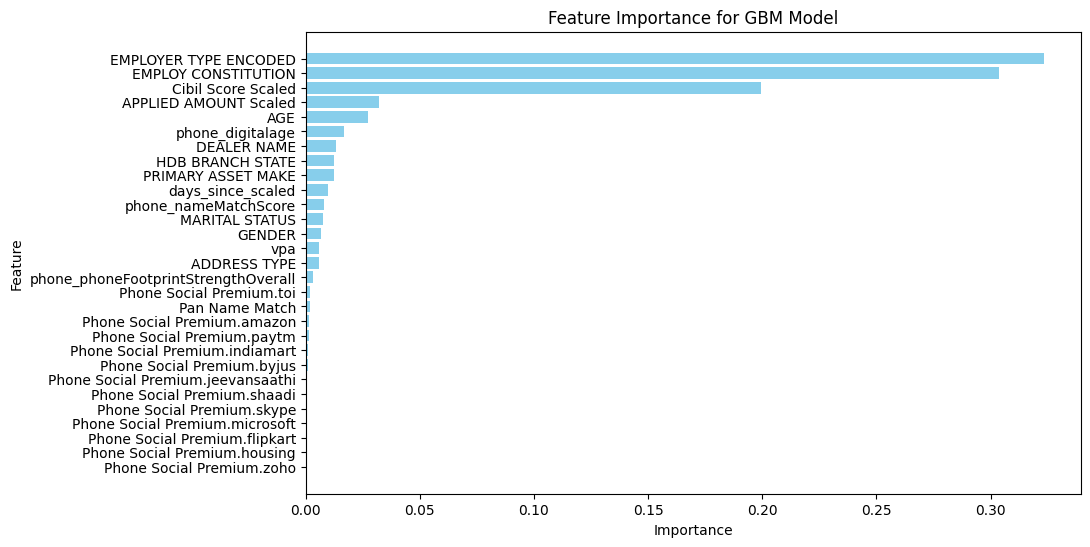

In [28]:
import matplotlib.pyplot as plt

feature_importances = gbm_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for GBM Model')
plt.gca().invert_yaxis()
plt.show()


In [29]:
y_pred = gbm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.89
Confusion Matrix:
[[521  82]
 [114 989]]
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.86      0.84       603
        True       0.92      0.90      0.91      1103

    accuracy                           0.89      1706
   macro avg       0.87      0.88      0.88      1706
weighted avg       0.89      0.89      0.89      1706



## Predictions

In [33]:
y_pred = gbm_model.predict(test_data)
temp_pred=[('APPROVED' if x==True else 'DECLINED') for x in y_pred]
final['Prediction']=temp_pred

In [34]:
final.head()

,UID,Prediction
0,1844045271814558464,APPROVED
1,1840349097823778816,APPROVED
2,1488102613362294272,APPROVED
3,555529923942874624,DECLINED
4,1010213070486150912,APPROVED


In [35]:
final.to_csv('predictions.csv', index=False)